<a href="https://colab.research.google.com/github/viegasgr/introDS/blob/main/IntroDS_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### AULA 1: Data Science: dados e visualizações


In [ ]:
import pandas as pd
notas = pd.read_csv('ratings.csv') #criando um dataframe
notas.head() #mostra os 5 primeiros

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.shape #qtd de colunas e linhas

(100836, 4)

In [ ]:
notas.columns = ["usuarioID", "filmeID", "nota", "momento"] #redefinindo o nome das colunas na variável "notas"
notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas['nota'] #cada coluna é uma 'series', uma série de valores
notas['nota'].unique() #diz quais valores existem em uma série, de forma única

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
notas['nota'].value_counts() #diz quanto de cada valor tem em uma série e ordena do valor que mais aparece para o que menos aparece

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [ ]:
media = notas['nota'].mean() #tira a média.
mediana = notas.nota.median() #tira a mediana

In [ ]:
notas.nota.head() #outra maneira de obter uma série de um dataframe

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

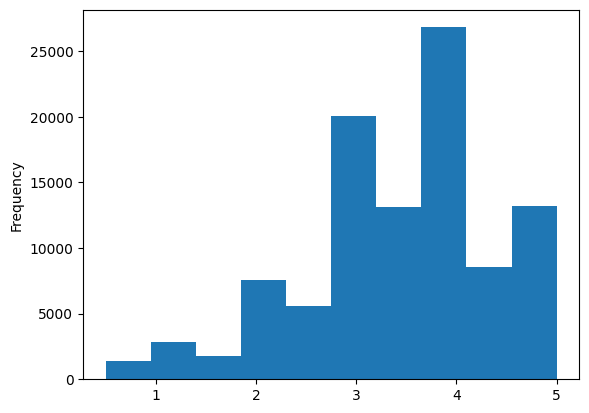

In [ ]:
notas.nota.plot(kind='hist') #plotando o histograma no plot do pandas

<Axes: >

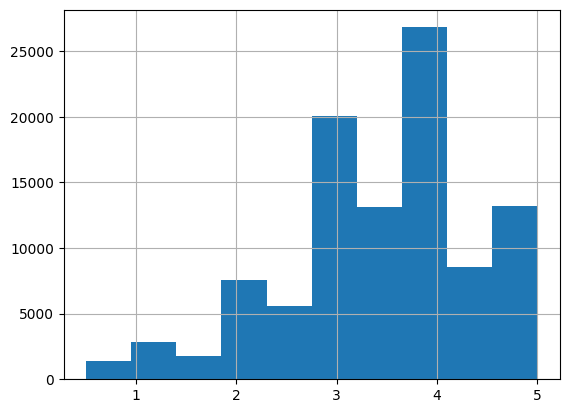

In [ ]:
notas.nota.hist() #plotando o histograma direto. achei mais feio, fica com umas linhas.

In [ ]:
notas.nota.describe() #dá várias informações sobre o dataframe

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<Axes: >

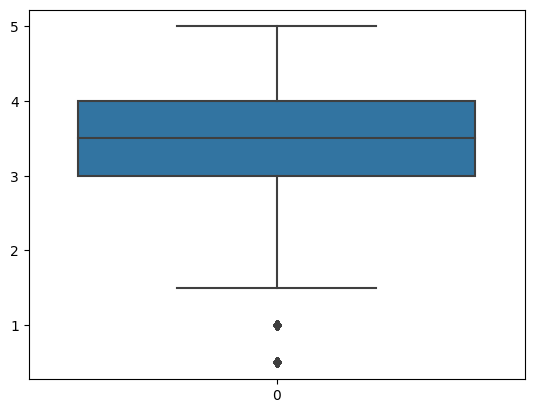

In [ ]:
import seaborn as sns #plota graficos bonitinhos

sns.boxplot(notas.nota)

### AULA 2: Análise exploratória

In [41]:
notas = pd.read_csv('ratings.csv')
notas.columns = ["usuarioID", "filmeID", "nota", "momento"]

filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeID', 'titulo', 'genero']
filmes.head()

,filmeID,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
notas.query('filmeID==1').nota #selecionando um filme ID especifico

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

In [9]:
notas.query('filmeID==1').nota.mean()

3.9209302325581397

In [12]:
notas.groupby('filmeID') #criou um dataframegroupby, que agrupou as notas a partir de uma série dentro do dataframe inicial

In [31]:
medias_por_filme = notas.groupby('filmeID').mean().nota #tira a média das notas de cada filme. retorna uma série cujo índice é o filmeID.
medias_por_filme.head()

filmeID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

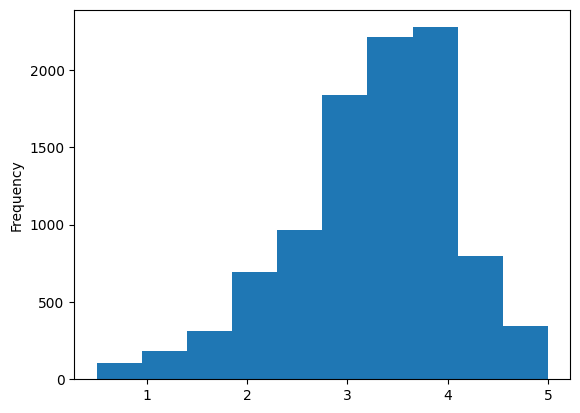

In [32]:
medias_por_filme.plot(kind='hist')

<Axes: >

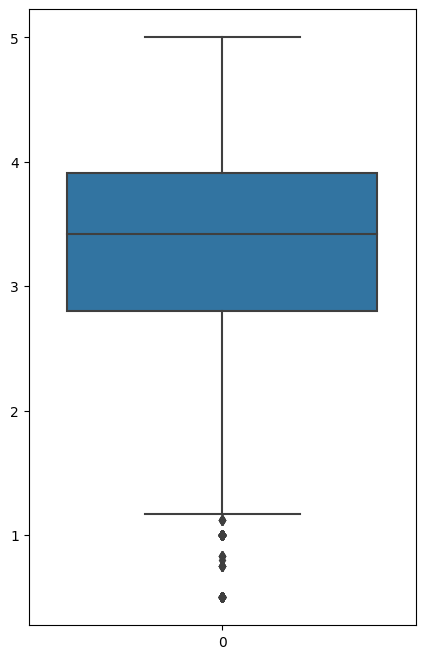

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8)) #plt é usado pelo seaborn e pelo pandas ent dá pra mexer nas configs a partir dele. esse muda o tamanho da fig.
sns.boxplot(medias_por_filme.values) #sns.boxplot(medias_por_filme) não funciona por um bug q não deixa não existir coluna 0 achei no stackoverflow essa maneira

In [35]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

<Axes: xlabel='nota', ylabel='Count'>

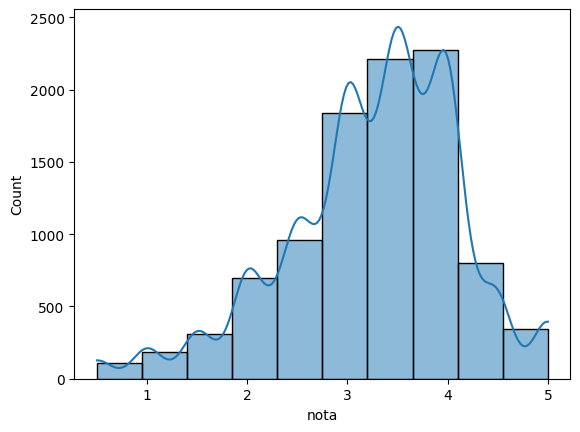

In [44]:
sns.histplot(medias_por_filme, kde=True, bins = 10) #fazer histograma a partir do seaborn. é falado no vídeo o distplot, que vai parar de ser usada.
#o kde mostra esse gráfico linha de distribuições aí
#outra maneira é o displot, que vai dar um gráfico bem parecido

### AULA 3: Variáveis

In [48]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [50]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [61]:
tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

In [ ]:
'''
Tipos de variável:
> Qualitativas/Categóricas:
>> Nominais; ex: tmdb.original_language
>> Ordinais; ex: escolaridade (ensino fundamental < ensino médio < ensino superior)

> Quantitativas:
>> Discretas/Intervalares; ex: tmdb.vote_count
>> Contínuas; ex: tmdb.vote_average
'''

###AULA 4: Data Visualization

In [65]:
tmdb['original_language'].value_counts() #para chamar o índice: .index ; para chamar os valores: .values

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

In [72]:
cont_lingua = tmdb['original_language'].value_counts().to_frame().reset_index() #transforma em dataframe e reseta o index.
cont_lingua.columns = ['original_language', 'total']
cont_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

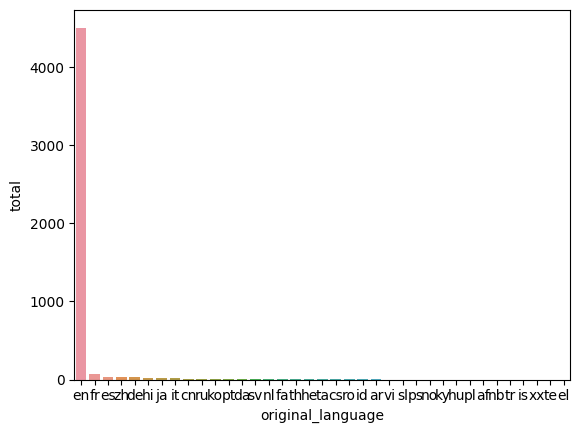

In [73]:
sns.barplot(x='original_language', y='total', data=cont_lingua) #mais baixo nivel, mais customizacao

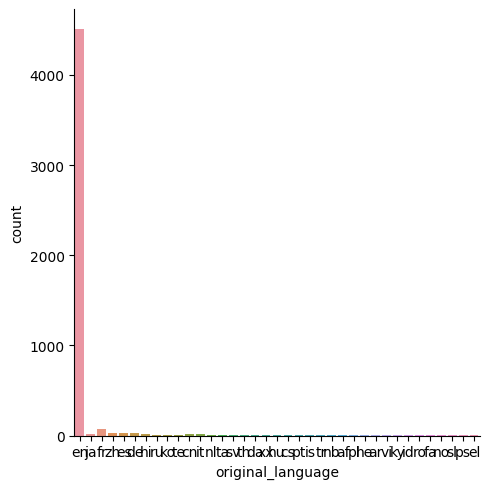

In [74]:
sns.catplot(x='original_language', kind='count', data=tmdb) #mais alto nível, trabalha com o dataframe original direto, kind é o tipo.
#não precisa transformar em uma série antes, mas não tá ordenado.

([<matplotlib.patches.Wedge at 0x7cca1ffd8e80>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

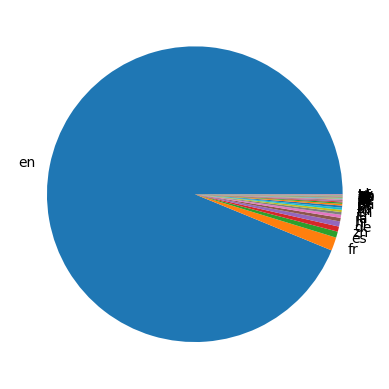

In [75]:
plt.pie(cont_lingua['total'], labels=cont_lingua['original_language'])

*Dá pra ver que os gráficos anteriores não estão comunicando de maneira clara o
que os dados nos dizem: inglês é a língua majoritária frente às demais. Vamos agora deixar essa informação mais evidente.*




In [79]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum() #soma todos os valores
total_en = total_por_lingua.loc['en'] #acha a qtd de filmes com 'en' como língua
total_resto = total_geral - total_en
print(total_en, total_resto)

4505 298


<Axes: xlabel='língua', ylabel='total'>

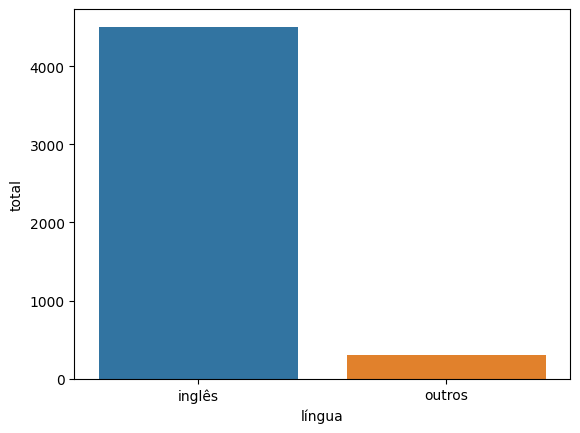

In [98]:
dados = {
    'língua' : ['inglês', 'outros'],
    'total' : [total_en, total_resto]
}
dados = pd.DataFrame(dados) #transforma os dados em dataframe
sns.barplot(x='língua', y='total', data=dados)

([<matplotlib.patches.Wedge at 0x7cca1fbcec20>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'inglês'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

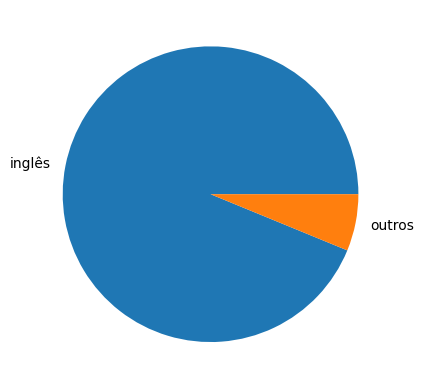

In [99]:
plt.pie(dados['total'], labels=dados['língua'])

> O gráfico de barras evidencia uma ordem de grandeza entre o que está sendo apresentado, enquanto o gráfico de pizza foca em demonstrar diferença.
É necessário perceber qual dos dois vai ser melhor aproveitado na visualização dos dados

*Agora, para visualizar quem está entre esses "outros":*

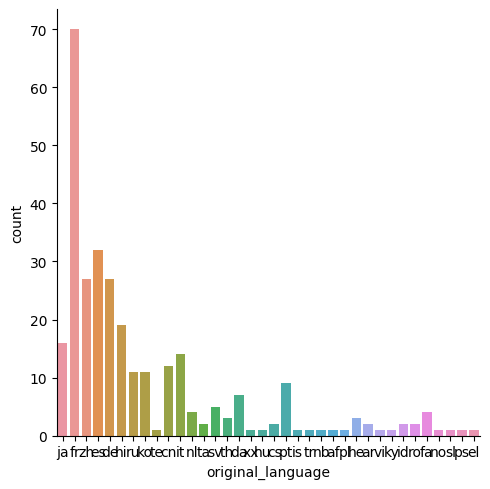

In [106]:
filmes_lingua_sem_en = tmdb.query("original_language != 'en'")
sns.catplot(x='original_language', kind='count', data = filmes_lingua_sem_en)

###AULA 5: Continuando com visualização


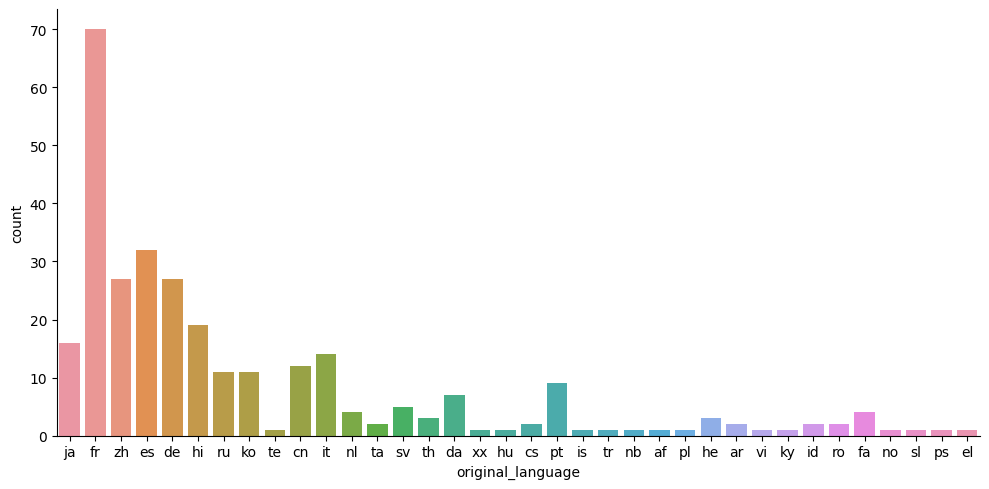

In [109]:
#voltando para o gráfico anterior, dos outros filmes, para melhorá-lo
#não adianta usar plt.figure(figsize=(x,y)) p mudar o tamanho pq é mt alto nível. a função inclusive chama outra chamada 'countplot'
#para fazer isso, usamos os atributos HEIGHT e ASPECT, o segundo sendo a qtd de vezes que o comprimento vai ser maior que o HEIGHT.
sns.catplot(x='original_language', kind='count',
            data = filmes_lingua_sem_en, aspect = 2)

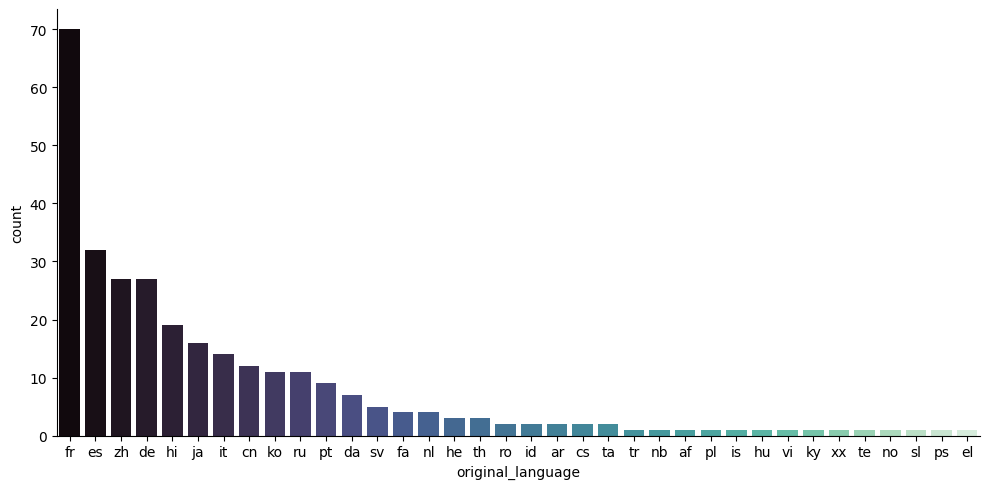

In [122]:
ordenar_filmes_lingua_sem_en = filmes_lingua_sem_en['original_language'].value_counts() #para ordenar os filmes por qtd
sns.catplot(x='original_language', kind='count',
            data = filmes_lingua_sem_en, aspect = 2,
            palette = 'mako', #escolher a paleta de cores
            order = ordenar_filmes_lingua_sem_en.index) #comunica ao seaborn a ordem do gráfico